In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
fr = pd.read_csv('FRvideos.csv')

In [3]:
fr.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
fr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
video_id                  40724 non-null object
trending_date             40724 non-null object
title                     40724 non-null object
channel_title             40724 non-null object
category_id               40724 non-null int64
publish_time              40724 non-null object
tags                      40724 non-null object
views                     40724 non-null int64
likes                     40724 non-null int64
dislikes                  40724 non-null int64
comment_count             40724 non-null int64
thumbnail_link            40724 non-null object
comments_disabled         40724 non-null bool
ratings_disabled          40724 non-null bool
video_error_or_removed    40724 non-null bool
description               37812 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
fr.drop(['video_id','publish_time','video_error_or_removed','ratings_disabled','comments_disabled','tags'], axis=1 ,inplace = True)

In [6]:
fr.head()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
0,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...
2,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,482153,76203,477,9580,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,Une nouvelle dose de dessins animés français e...
3,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,925222,85016,550,4303,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o..."
4,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,141695,8091,72,481,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,Sauts à plus de 4 mètres de haut dans un tramp...


In [7]:
fr.tail()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
40719,18.14.06,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...
40720,18.14.06,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...
40721,18.14.06,UN ANIME EXPLOSIF A VOIR ABSOLUMENT !,RushManga,22,47510,4601,61,615,https://i.ytimg.com/vi/nt25ec7nzIM/default.jpg,•● Yozakura Quartet ~Hana no Uta~ ●•☆ S'abonne...
40722,18.14.06,"Նռան հատիկ, Սերիա 192 / Pomegranate seed / Nra...",PanArmenian TV,1,78117,244,74,46,https://i.ytimg.com/vi/NlxE_QQMRzg/default.jpg,Follow Armenia TV on social platforms:Instagra...
40723,18.14.06,Mandoumbé ak Koor Gui 2018 Episode 28,Yesdakar,24,46604,947,37,127,https://i.ytimg.com/vi/_LgKglfnqlc/default.jpg,NaN


In [12]:
f_mostlikes_channel = fr.likes > 1000000
f_mostviews_channel = fr.views > 10000000
f_mostdislike_channel = fr.dislikes > 5000
f_mostcomment_channel = fr.comment_count > 800000
fr[f_mostlikes_channel & f_mostviews_channel & f_mostcomment_channel]

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
5040,17.09.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,75969469,2251828,1127813,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,"YouTube Rewind 2017. Celebrating the videos, p..."
35626,18.20.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,62796390,4470923,119052,905925,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
35902,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


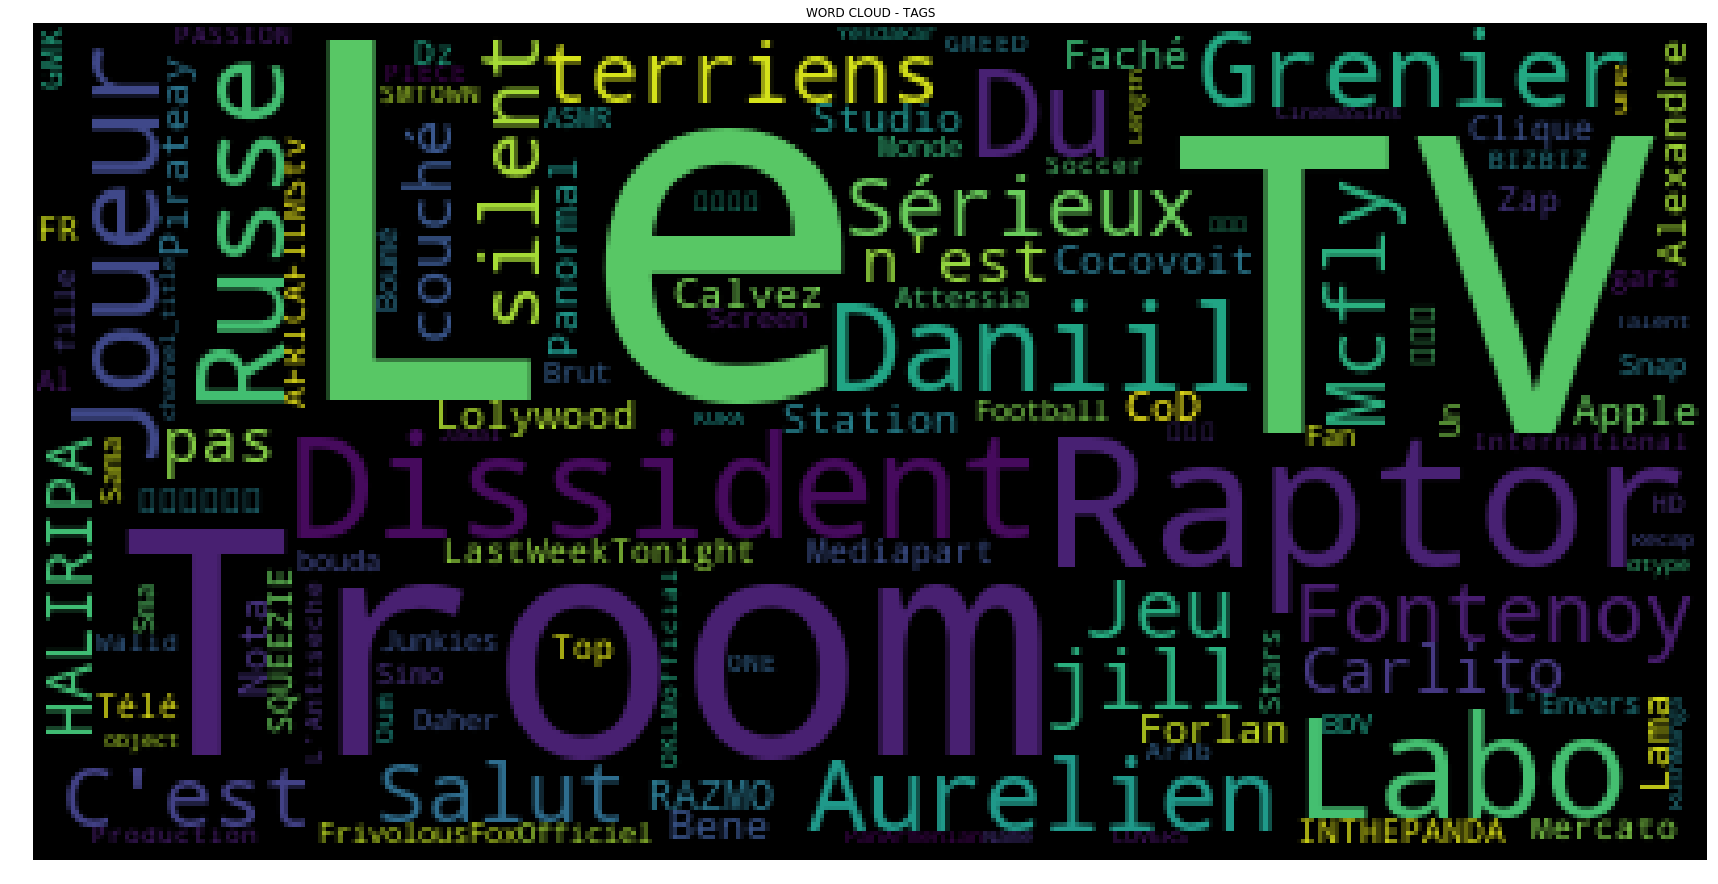

In [13]:
df_youtube = pd.DataFrame(fr)
plt.figure(figsize = (30,30))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['channel_title']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


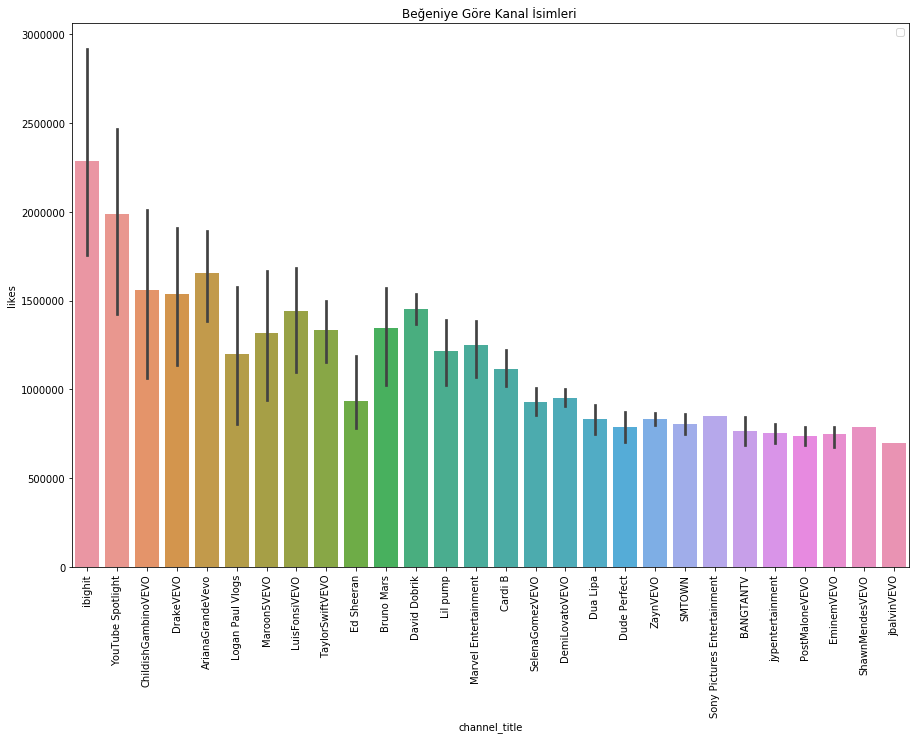

In [14]:
new_index = fr['likes'].sort_values(ascending = False).index.values
sorted_data = fr.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['likes'].head(100),data = sorted_data)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğeniye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


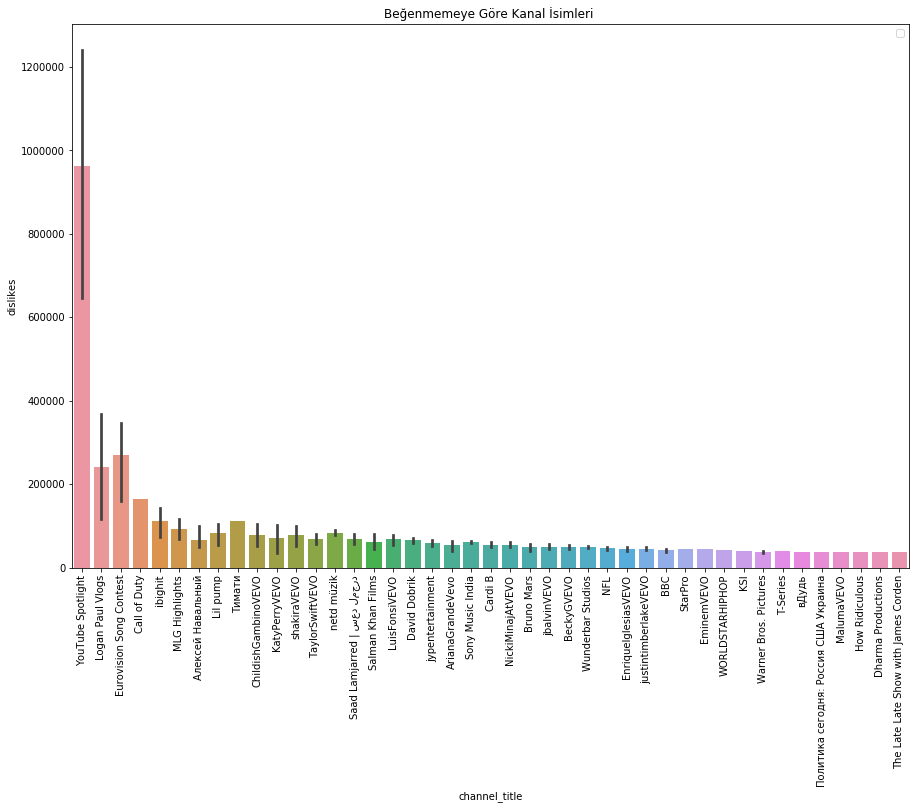

In [15]:
new_index = fr['dislikes'].sort_values(ascending = False).index.values
sorted_data = fr.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['dislikes'].head(100),data = fr)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğenmemeye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


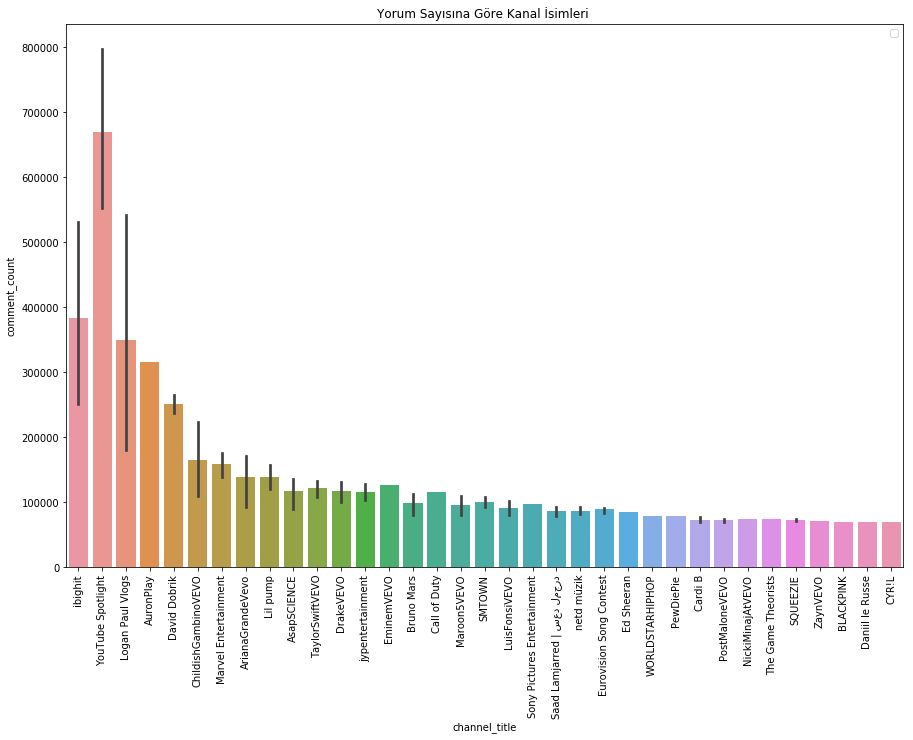

In [16]:
new_index = fr['comment_count'].sort_values(ascending = False).index.values
sorted_data = fr.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['comment_count'].head(100),data = fr)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Yorum Sayısına Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


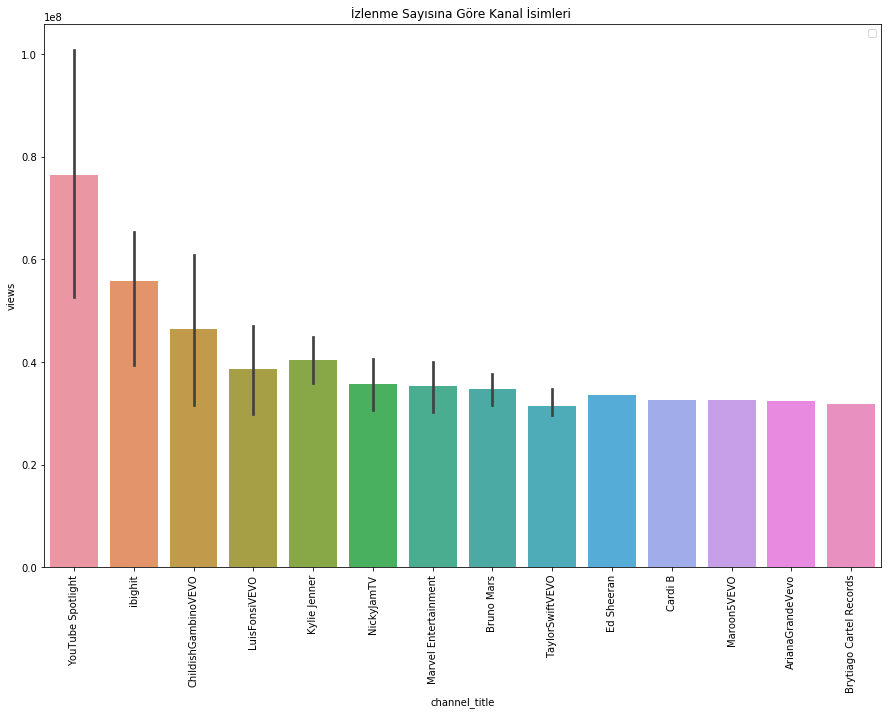

In [17]:
new_index = fr['views'].sort_values(ascending = False).index.values
sorted_data = fr.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(30) , y = sorted_data['views'].head(30),data = fr)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('İzlenme Sayısına Göre Kanal İsimleri ')
plt.show()